# Analysis of Battles

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Checking the dataset**

In [2]:
df=pd.read_csv('C:\\Users\\VGopalak\\Downloads\\archive\\battles.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

In [3]:
df.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [5]:
df.describe()

,year,battle_number,defender_3,defender_4,major_death,major_capture,attacker_size,defender_size,summer
count,38.000000,38.000000,0.0,0.0,37.000000,37.000000,24.000000,19.000000,37.000000
mean,299.105263,19.500000,NaN,NaN,0.351351,0.297297,9942.541667,6428.157895,0.702703
std,0.689280,11.113055,NaN,NaN,0.483978,0.463373,20283.092065,6225.182106,0.463373
min,298.000000,1.000000,NaN,NaN,0.000000,0.000000,20.000000,100.000000,0.000000
25%,299.000000,10.250000,NaN,NaN,0.000000,0.000000,1375.000000,1070.000000,0.000000
50%,299.000000,19.500000,NaN,NaN,0.000000,0.000000,4000.000000,6000.000000,1.000000
75%,300.000000,28.750000,NaN,NaN,1.000000,1.000000,8250.000000,10000.000000,1.000000
max,300.000000,38.000000,NaN,NaN,1.000000,1.000000,100000.000000,20000.000000,1.000000


**Defender_3 and Defender_4 has only Nan values.**

**Major_death,major_capture and summer are categorical columns. It has only 0 and 1**

**In attacker_size mean is greater than median So there might be skewness towards right**

**Defender_size seems normal as mean and median are more or less same**

**We will get clear picture when we visualize the seperate columns**

In [7]:
df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [8]:
df.shape

(38, 25)

**Missing Value function**

In [9]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe

In [10]:
missing_check(df)

,Total,Percent
defender_4,38,1.000000
defender_3,38,1.000000
attacker_4,36,0.947368
defender_2,36,0.947368
attacker_3,35,0.921053
note,33,0.868421
attacker_2,28,0.736842
defender_size,19,0.500000
attacker_size,14,0.368421
defender_commander,10,0.263158


**Defender_4 and Defender_3 has 100 % of missing Values.**

**attacker_4,defender_2,attacker_3 has more than 90 % of missing values.**

**We will drop these columns**

In [11]:
df.drop(['defender_4','defender_3','attacker_4','defender_2','attacker_3'],axis=1,inplace=True)

# Numerical Variables

**Correlation**

In [14]:
df.corr()

,year,battle_number,major_death,major_capture,attacker_size,defender_size,summer
year,1.000000,0.906781,-0.341050,-0.166234,0.155841,-0.366048,-0.841912
battle_number,0.906781,1.000000,-0.270421,-0.105225,0.086418,-0.297730,-0.799090
major_death,-0.341050,-0.270421,1.000000,0.264464,0.267966,0.081815,0.337136
major_capture,-0.166234,-0.105225,0.264464,1.000000,0.331961,0.249510,0.142112
attacker_size,0.155841,0.086418,0.267966,0.331961,1.000000,-0.112118,-0.273054
defender_size,-0.366048,-0.297730,0.081815,0.249510,-0.112118,1.000000,0.347108
summer,-0.841912,-0.799090,0.337136,0.142112,-0.273054,0.347108,1.000000


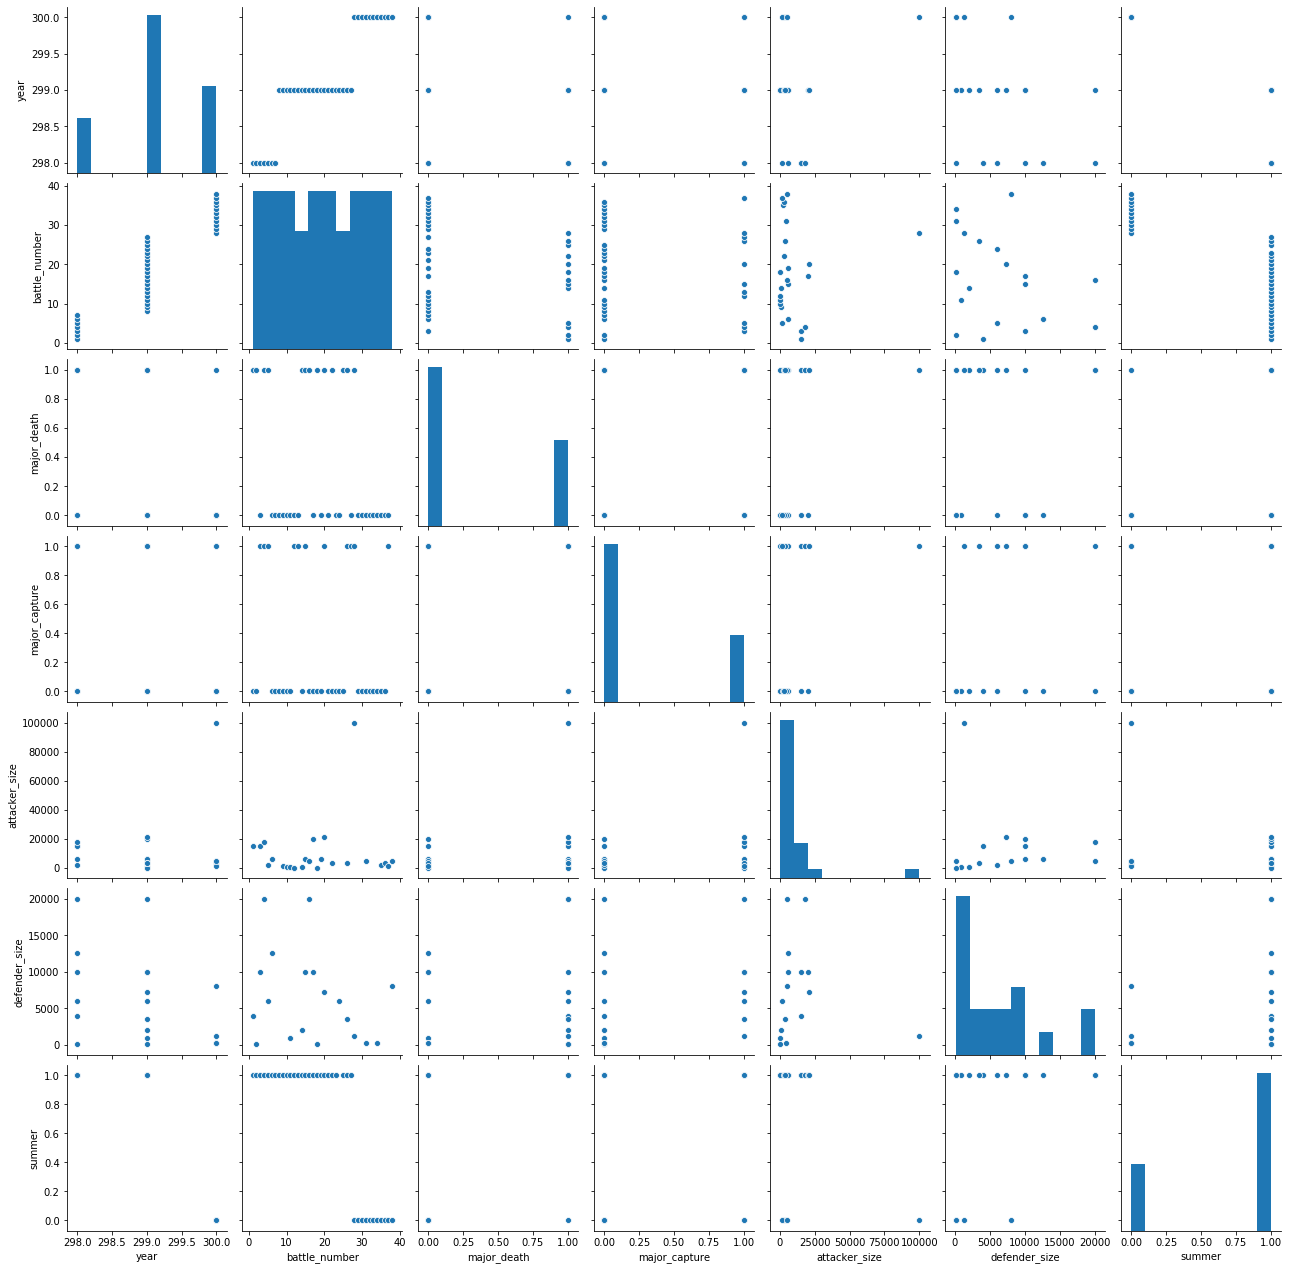

In [15]:
import seaborn as sns
sns.pairplot(df)

**We dont find proper correlation with any of the columns.**

**Checking Skewness**

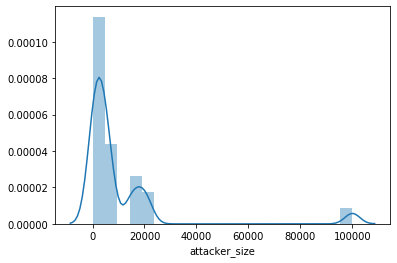

In [16]:
sns.distplot(df['attacker_size'])

**As we guessed, there is skewness towards right.**

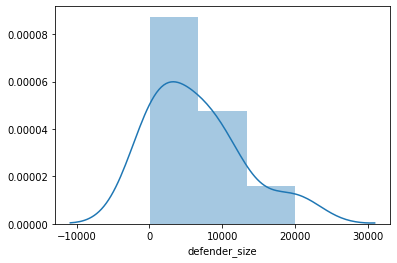

In [17]:
sns.distplot(df['defender_size'])

**Here we see some normal distribution.**

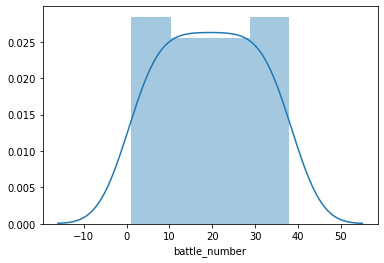

In [18]:
sns.distplot(df['battle_number'])

**We can see battle_number is wider around the mean.**

**We have Explored all numerical variables**

**Checking for Outliers**

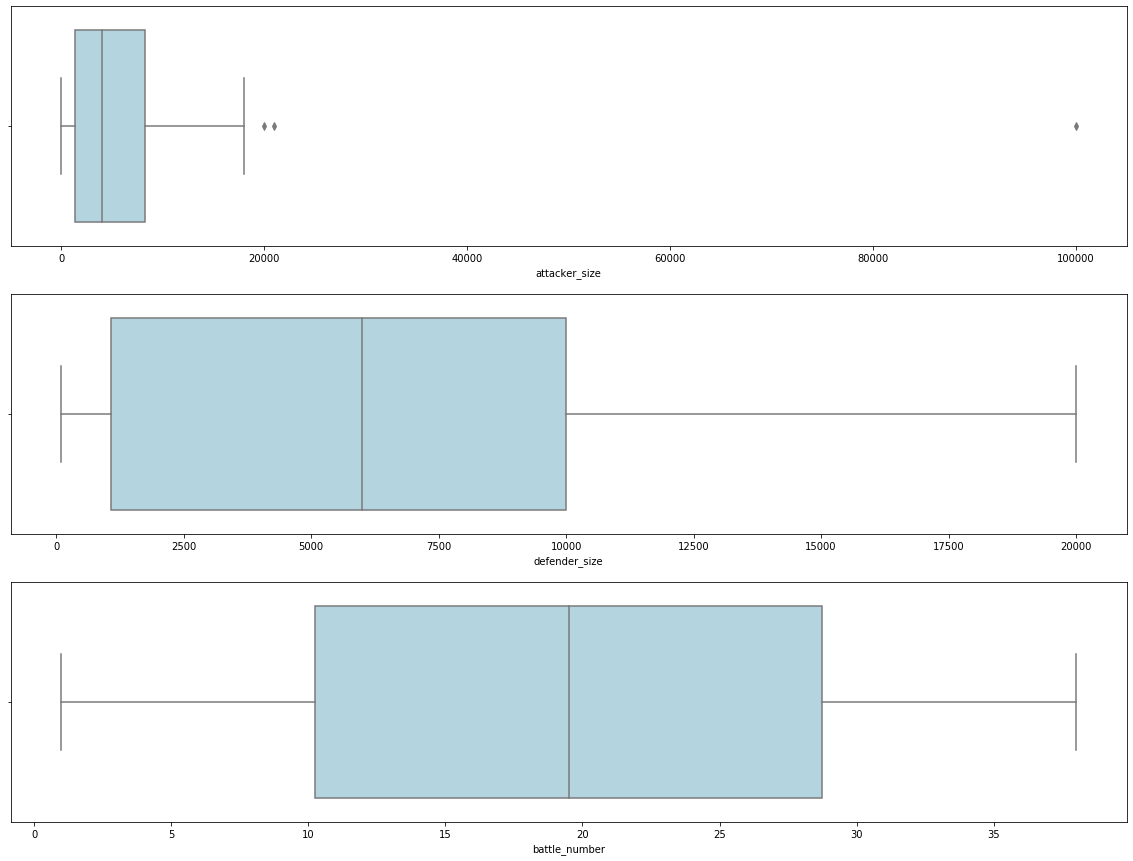

In [30]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1)
sns.boxplot(x=df['attacker_size'],color='lightblue')


plt.subplot(3,1,2)
sns.boxplot(x=df['defender_size'],color='lightblue')


plt.subplot(3,1,3)
sns.boxplot(x=df['battle_number'],color='lightblue')


**Attacker size has few outliers**

# Categorical Variables

In [36]:
df.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'defender_1', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

Text(0.5, 1.0, 'year')

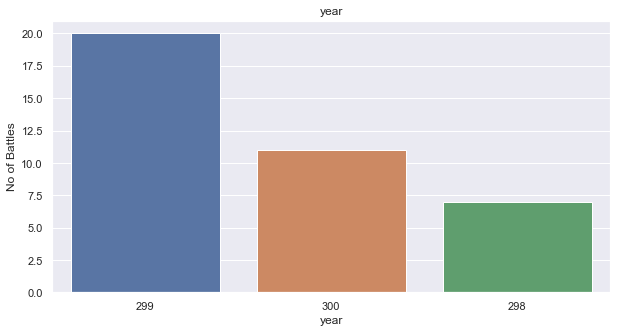

In [105]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(df['year'],order=df['year'].value_counts().index)
plt.xlabel('year')
plt.ylabel('No of Battles')
plt.title('year')

**More number of battles happened in 299**

Text(0.5, 1.0, 'Attacking King Counts')

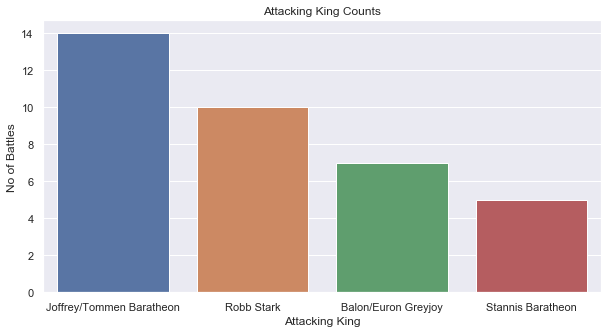

In [52]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
sns.countplot(df['attacker_king'])
plt.xlabel('Attacking King')
plt.ylabel('No of Battles')
plt.title('Attacking King Counts')

**We can see joffrey/Tommen Baratheon has more number of attacks followed by Robb stark.**

Text(0.5, 1.0, 'Defending King Counts')

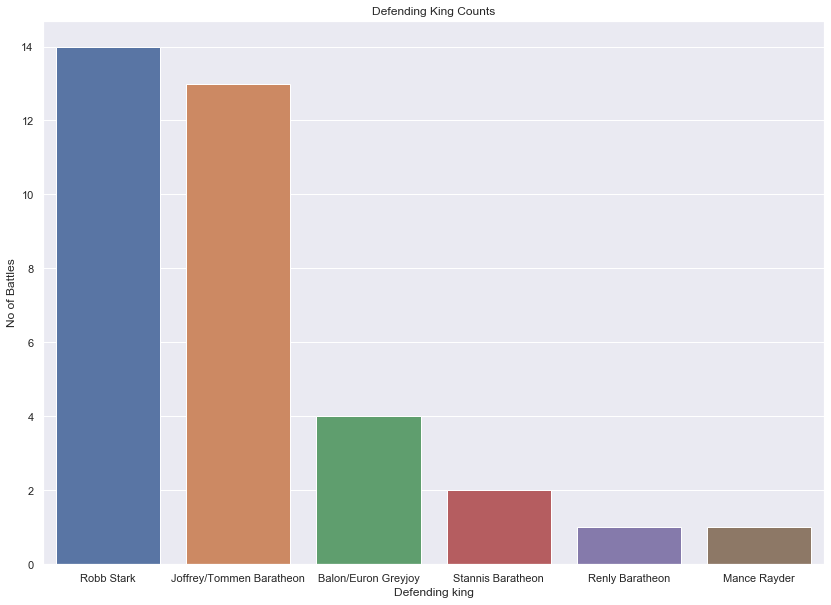

In [62]:
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
sns.countplot(df['defender_king'],order=df['defender_king'].value_counts().index)
plt.xlabel('Defending king')
plt.ylabel('No of Battles')
plt.title('Defending King Counts')

**Robb Stark has more number if battles as defender followed by Joffrey/Tommen.**

**Clearly indicates Robb and Joffrey are attacking each other**

Text(0.5, 1.0, 'Battle Type')

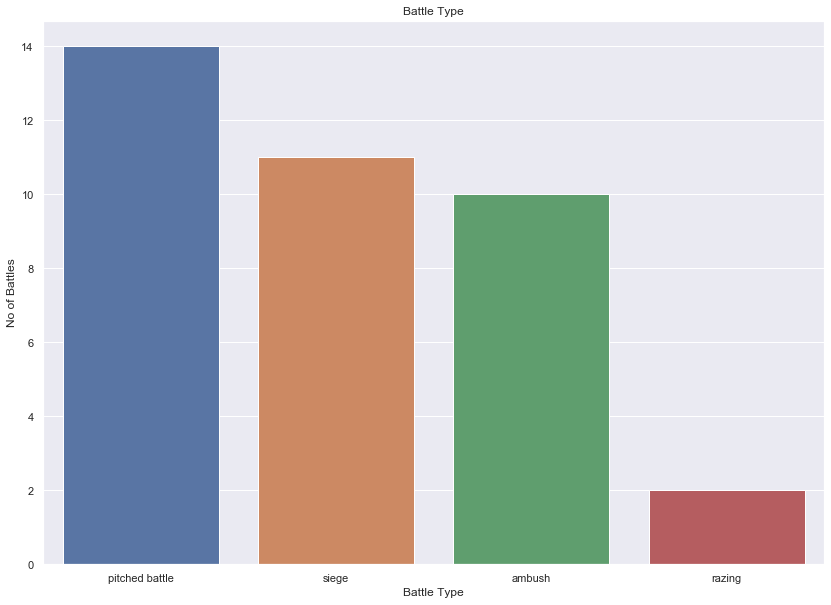

In [64]:
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
sns.countplot(df['battle_type'],order=df['battle_type'].value_counts().index)
plt.xlabel('Battle Type')
plt.ylabel('No of Battles')
plt.title('Battle Type')

**Pitched Battle type is preferred by most of the kings followed by Siege and Ambush.**

Text(0.5, 1.0, 'Death in Battle')

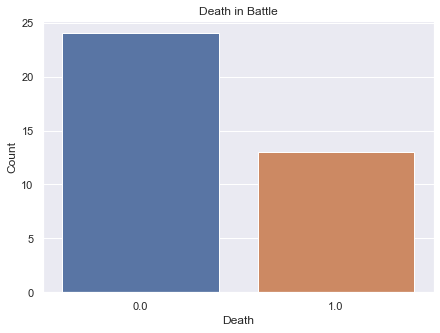

In [67]:
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
sns.countplot(df['major_death'],order=df['major_death'].value_counts().index)
plt.xlabel('Death')
plt.ylabel('Count')
plt.title('Death in Battle')

**As we can see the death count is less in battles**

Text(0.5, 1.0, 'Capture in Battle')

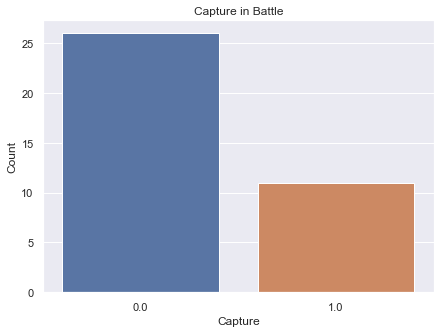

In [68]:
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
sns.countplot(df['major_capture'],order=df['major_capture'].value_counts().index)
plt.xlabel('Capture')
plt.ylabel('Count')
plt.title('Capture in Battle')

**There is less number of captures.**

Text(0.5, 1.0, 'Battle in summer')

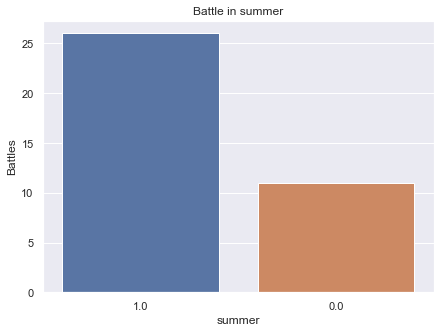

In [70]:
plt.figure(figsize=(7,5))
sns.set(style="darkgrid")
sns.countplot(df['summer'],order=df['summer'].value_counts().index)
plt.xlabel('summer')
plt.ylabel('Battles')
plt.title('Battle in summer')

**As we can see more number of battles happened during summer.**

Text(0.5, 1.0, 'Attcker Outcome')

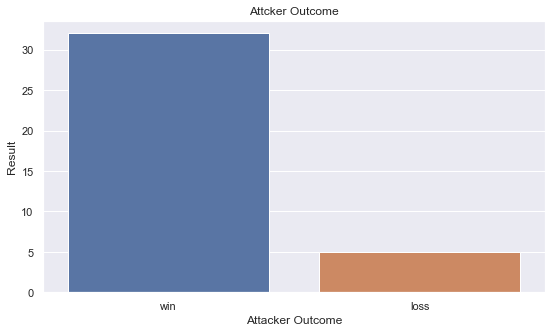

In [107]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df['attacker_outcome'],order=df['attacker_outcome'].value_counts().index)
plt.xlabel('Attacker Outcome')
plt.ylabel('Result')
plt.title('Attcker Outcome')

**We can see whoever is attacking first has won many battles**

Text(0.5, 1.0, 'Battle Region')

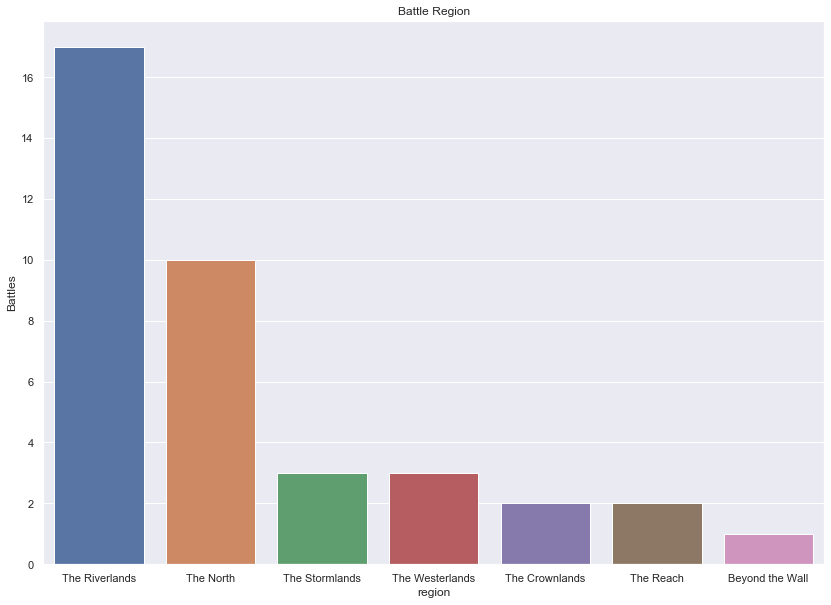

In [79]:
plt.figure(figsize=(14,10))
sns.set(style="darkgrid")
sns.countplot(df['region'],order=df['region'].value_counts().index)
plt.xlabel('region')
plt.ylabel('Battles')
plt.title('Battle Region')

**We have left few columns to visulize which seems not providing useful insights**

# Bivariate Analysis

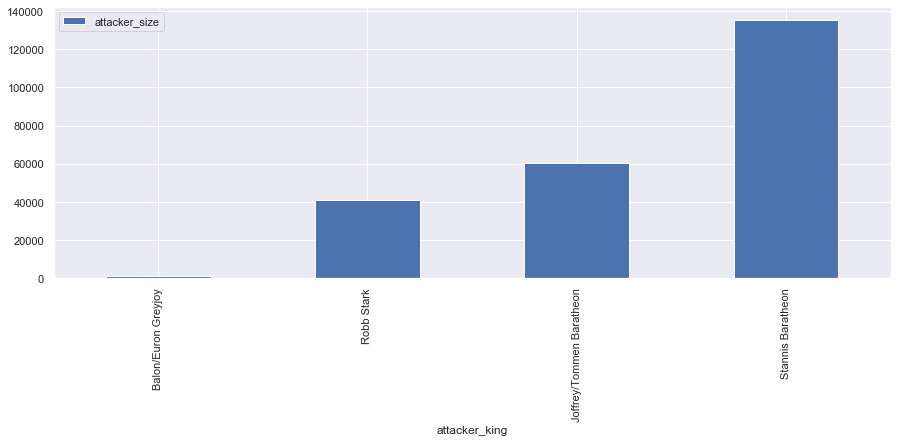

In [93]:

df.groupby(by='attacker_king')['attacker_size'].sum().reset_index().sort_values(['attacker_size']).head(10).plot(x='attacker_king',
                                                                                                                y='attacker_size',
                                                                                                                kind='bar',
                                                                                                                figsize=(15,5))

**Stannis Baratheon has more attacker size compared to others**

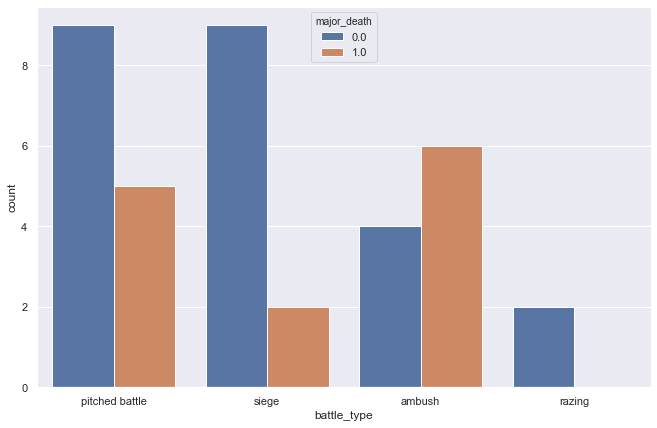

In [101]:
plt.figure(figsize=(11,7))
sns.countplot(x='battle_type',data=df,hue='major_death',order=df['battle_type'].value_counts().index)

**There is no death for razing battle type .May be data is not reported for razing.**

**In siege type number of deaths are less compared to others.**

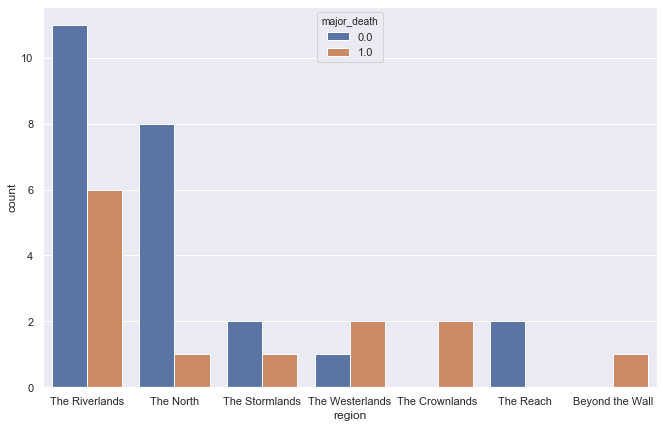

In [102]:
plt.figure(figsize=(11,7))
sns.countplot(x='region',data=df,hue='major_death',order=df['region'].value_counts().index)

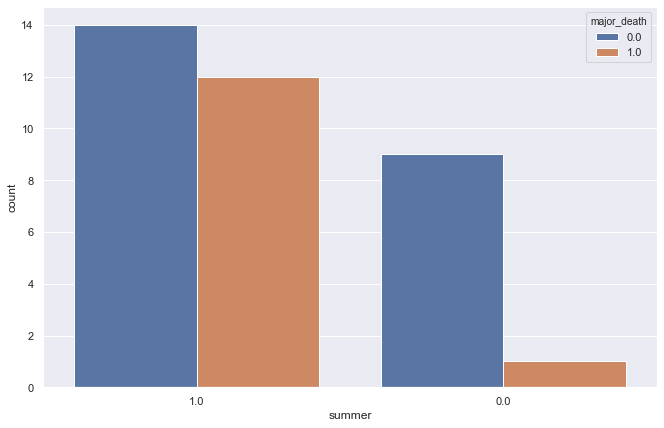

In [103]:
plt.figure(figsize=(11,7))
sns.countplot(x='summer',data=df,hue='major_death',order=df['summer'].value_counts().index)

**In summer deaths and non-deaths are mostly equal. Hoewever when it is not summer death rates are low.**

**Riverlands has more number of deaths**

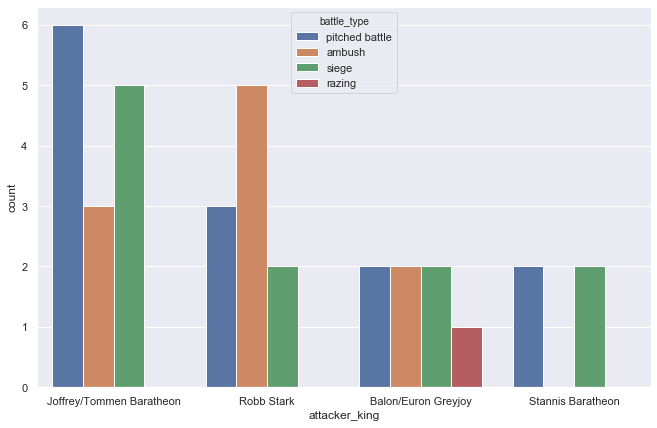

In [108]:
plt.figure(figsize=(11,7))
sns.countplot(x='attacker_king',data=df,hue='battle_type',order=df['attacker_king'].value_counts().index)

**We can see Joffrey/Tommen preferred pitched battle and seige attck most of the time.**

**Robb Stark preferred ambush most of the time**

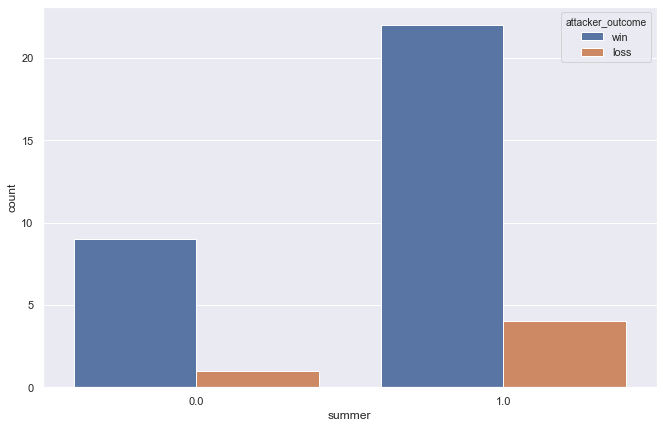

In [122]:
plt.figure(figsize=(11,7))
sns.countplot(x='summer',data=df,hue='attacker_outcome')

**More number of wins happended at summer**

# Statistical Analysis

Using EDA we can see some relationships exists between the features. Let us prove that statistically.

**Summer vs Winning**

**Does Summer has effect on winning?**

**H0: Summer has no effect on winning.**

**H1: Summer has effect on winning.**

**We are using Chi-square test to compare two categorical variables**

In [119]:
from scipy.stats import ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import scipy.stats as stats 
import numpy as np

In [124]:
crosstab=pd.crosstab(df['summer'],df['attacker_outcome'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)


In [125]:
print('P_Value:', p_value)

P_Value: 0.9048376369496919


In [121]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Summer has effect on winning.')
else:
    print('Fail to Reject Null Hypothesis.Summer has no effect on winning.')

Fail to Reject Null Hypothesis.Summer has no effect on winning.


**Summer vs Death**

**Does Summer has effect on Death?**

**H0: Summer has no effect on Death.**

**H1: Summer has effect on Death.**

**We are using Chi-square test to compare two categorical variables**

In [130]:
crosstab=pd.crosstab(df['summer'],df['major_death'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 0.10195056464430251


In [131]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Summer has effect on Death.')
else:
    print('Fail to Reject Null Hypothesis.Summer has no effect on Death.')

Fail to Reject Null Hypothesis.Summer has no effect on Death.


**Winning vs Death**

**Does Winning has effect on Death?**

**H0: Winning has no effect on Death.**

**H1: Winning has effect on Death.**

**We are using Chi-square test to compare two categorical variables**

In [132]:
crosstab=pd.crosstab(df['attacker_outcome'],df['major_death'])
chi,p_value,dof,expected=stats.chi2_contingency(crosstab)
print('P_Value:', p_value)

P_Value: 0.07908925308443773


In [133]:
if p_value < 0.05:  # Setting our significance level at 5%
    print('Rejecting Null Hypothesis.Winning has effect on Death.')
else:
    print('Fail to Reject Null Hypothesis.Winning has no effect on Death.')

Fail to Reject Null Hypothesis.Winning has no effect on Death.


# Character Death Analysis

In [109]:
df_characters=pd.read_csv('C:\\Users\\VGopalak\\Downloads\\archive\\character-deaths.csv')

In [110]:
df_characters.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [111]:
df_characters.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [112]:
df_characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [114]:
df_characters.shape

(917, 13)

In [115]:
df_characters.describe()

,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
count,305.000000,307.000000,299.000000,905.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,299.157377,2.928339,40.070234,28.861878,0.828790,0.468920,0.272628,0.353326,0.424209,0.272628,0.284624
std,0.703483,1.326482,20.470270,20.165788,0.376898,0.499305,0.445554,0.478264,0.494492,0.445554,0.451481
min,297.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,299.000000,2.000000,25.500000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,299.000000,3.000000,39.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,300.000000,4.000000,57.000000,43.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,300.000000,5.000000,80.000000,80.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
missing_check(df_characters)

,Total,Percent
Death Chapter,618,0.673937
Death Year,612,0.667394
Book of Death,610,0.665213
Book Intro Chapter,12,0.013086
DwD,0,0.000000
FfC,0,0.000000
SoS,0,0.000000
CoK,0,0.000000
GoT,0,0.000000
Nobility,0,0.000000


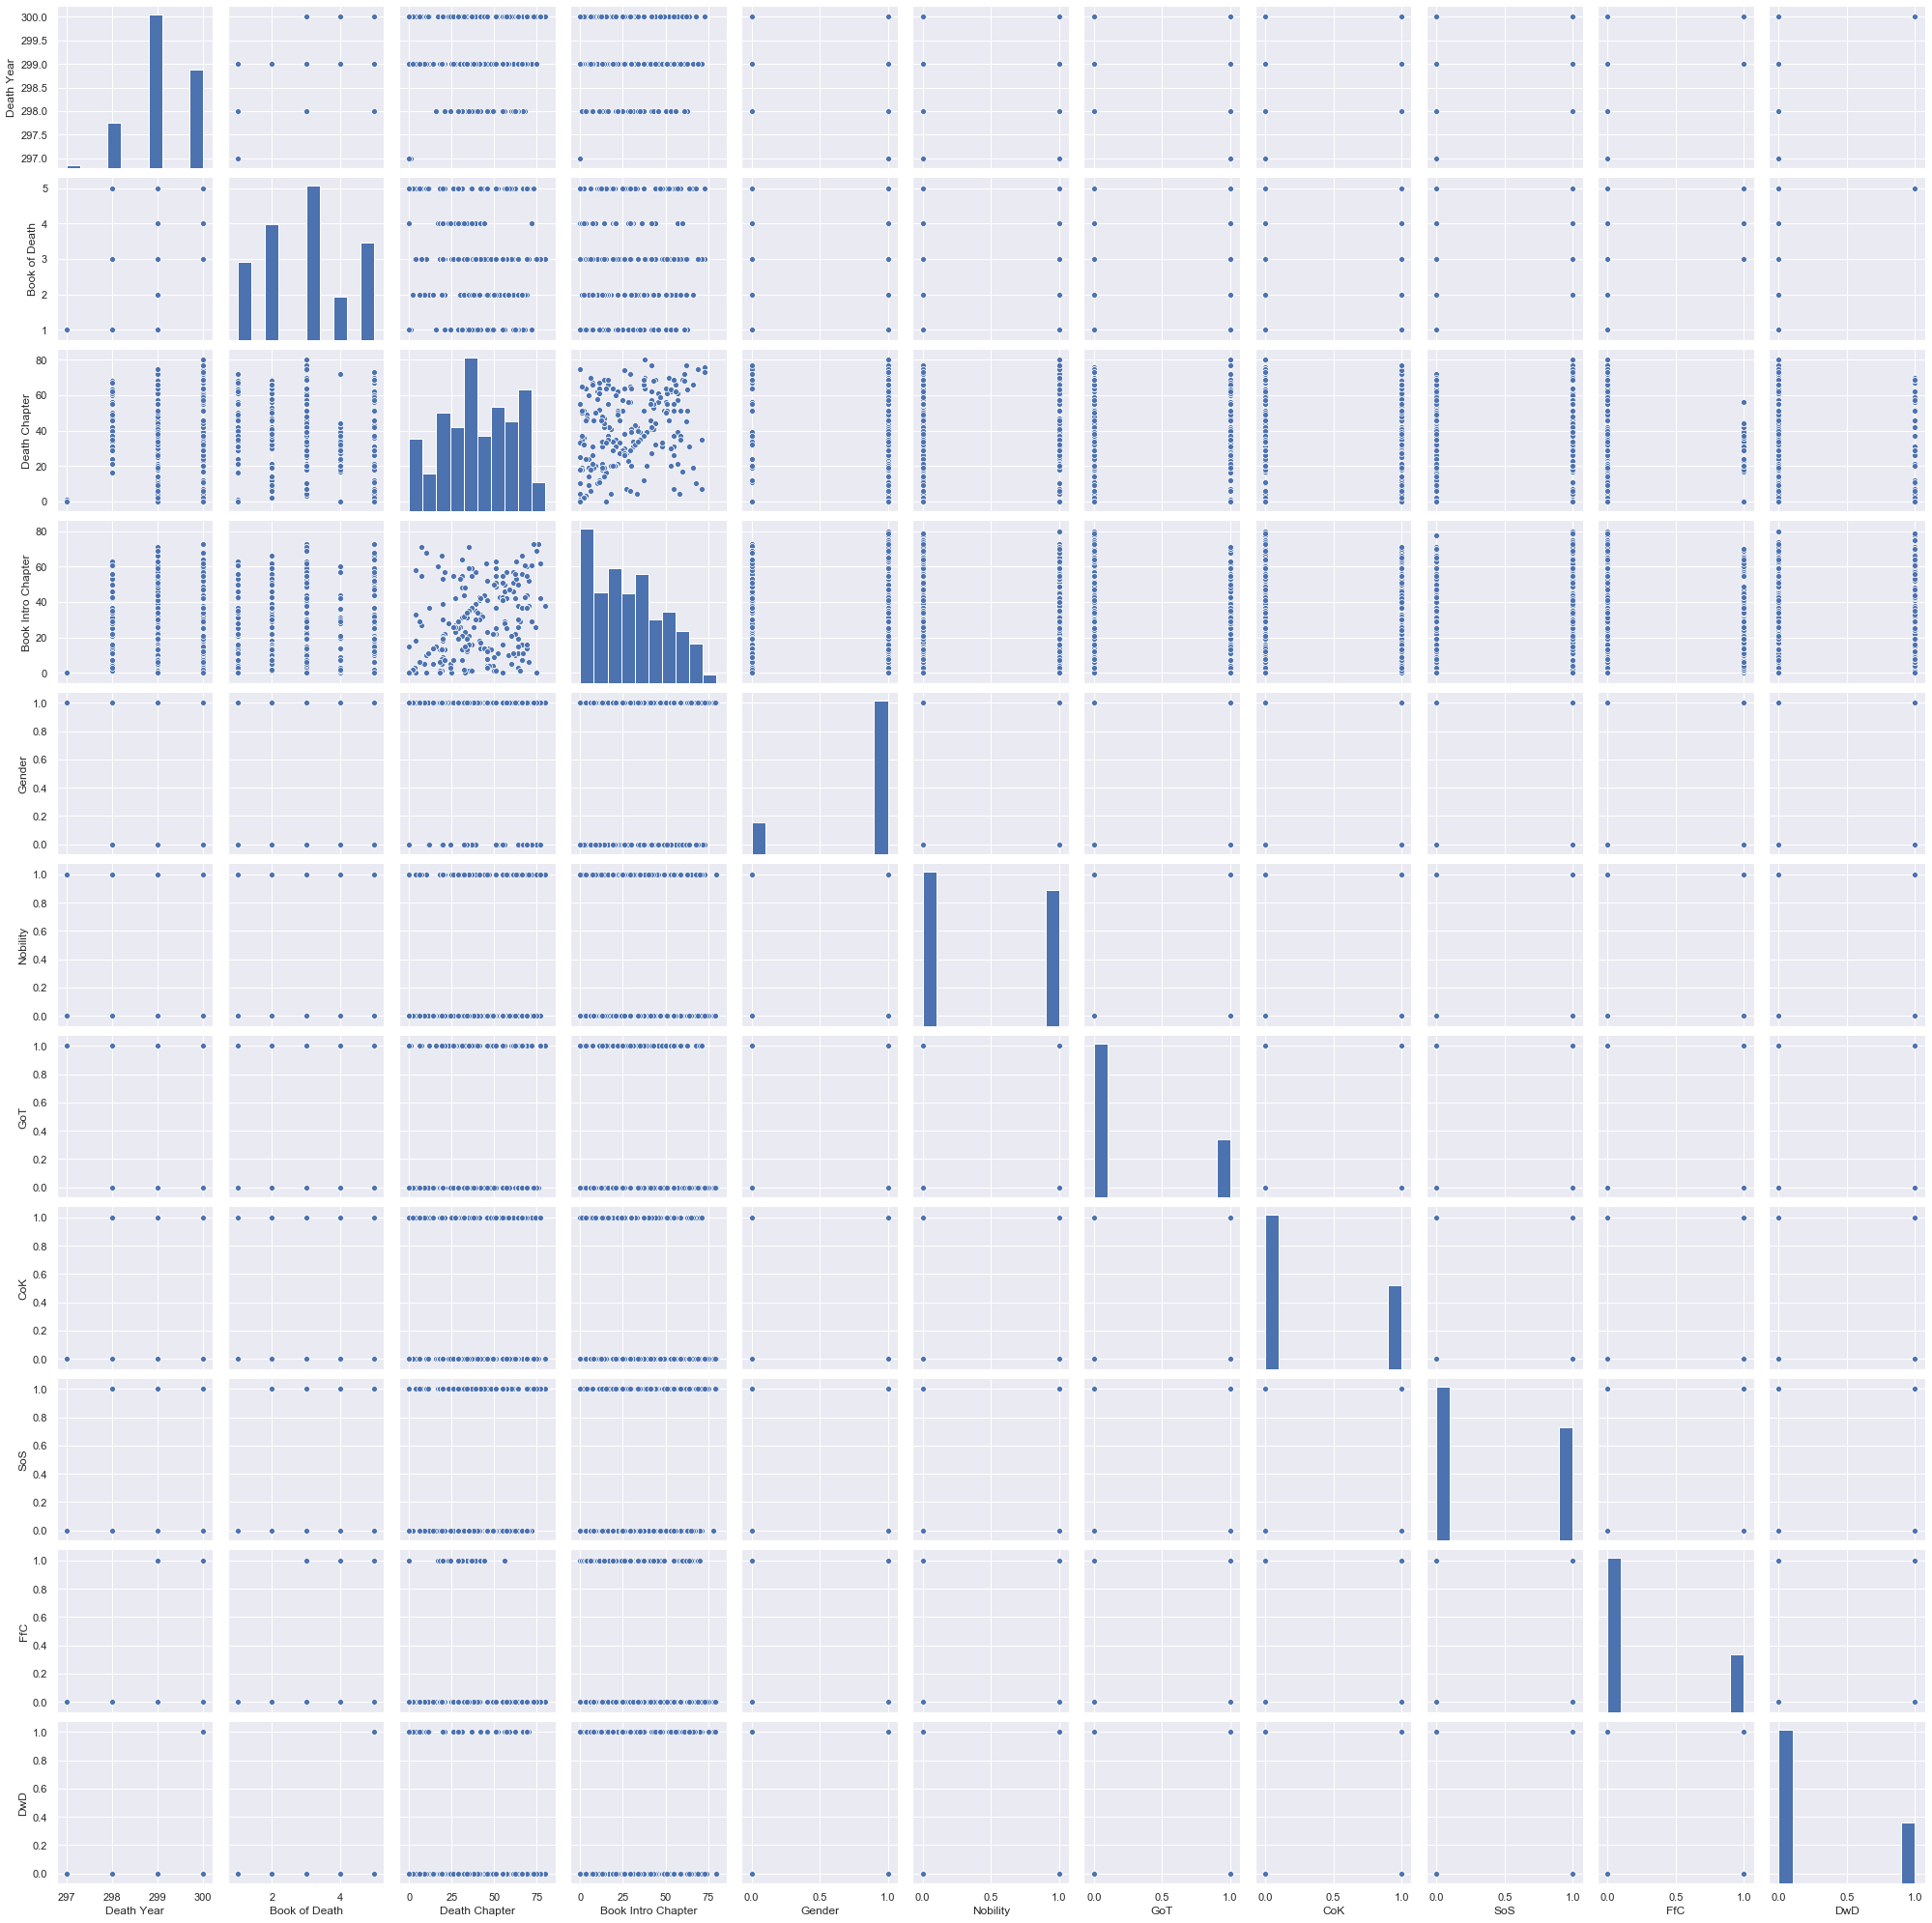

In [117]:
import seaborn as sns
sns.pairplot(df_characters)

**Only death chapter and book intro chapter has little relation. Each individually distributed normally.**

**Rest of the features are categorical features.**

In [134]:
df_characters.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

Text(0.5, 1.0, 'Character Gender')

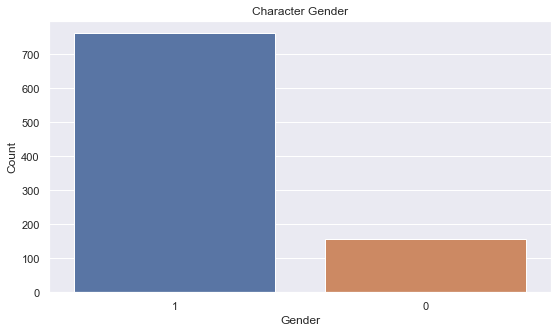

In [135]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['Gender'],order=df_characters['Gender'].value_counts().index)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Character Gender')

**More number of male characters compared to female.**

**Number of characters appeared in first book**

Text(0.5, 1.0, 'First Book Count')

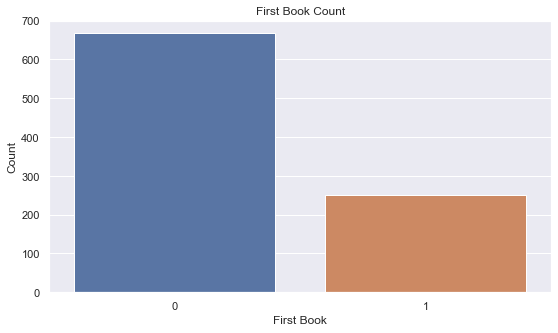

In [148]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['GoT'],order=df_characters['GoT'].value_counts().index)
plt.xlabel('First Book')
plt.ylabel('Count')
plt.title('First Book Count')

**Number of characters appeared in Second book**

Text(0.5, 1.0, 'Second Book Count')

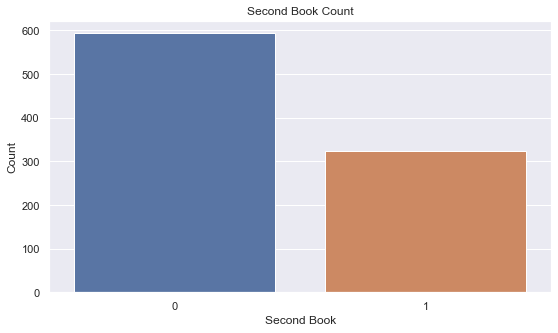

In [144]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['CoK'],order=df_characters['CoK'].value_counts().index)
plt.xlabel('Second Book')
plt.ylabel('Count')
plt.title('Second Book Count')

**Number of characters appeared in Third Book**

Text(0.5, 1.0, 'Third Book Count')

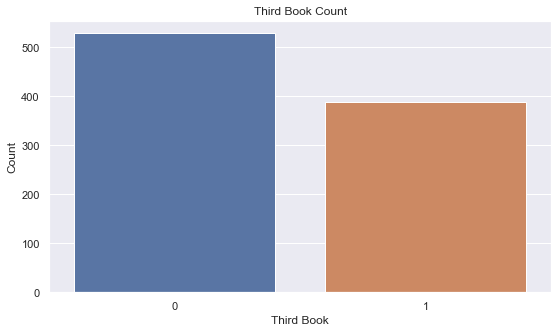

In [145]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['SoS'],order=df_characters['SoS'].value_counts().index)
plt.xlabel('Third Book')
plt.ylabel('Count')
plt.title('Third Book Count')

**Number of characters appeared in Fourth Book**

Text(0.5, 1.0, 'Fourth Book Count')

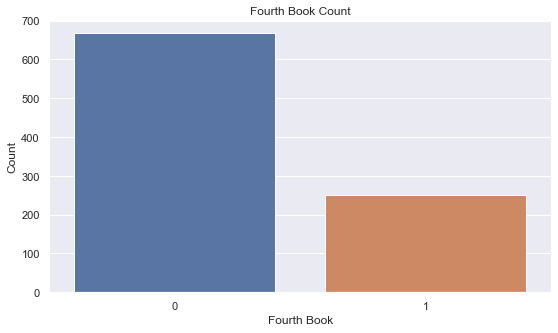

In [150]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['FfC'],order=df_characters['FfC'].value_counts().index)
plt.xlabel('Fourth Book')
plt.ylabel('Count')
plt.title('Fourth Book Count')

**Number of characters appeared in Fifth Book**

Text(0.5, 1.0, 'Fifth Book Count')

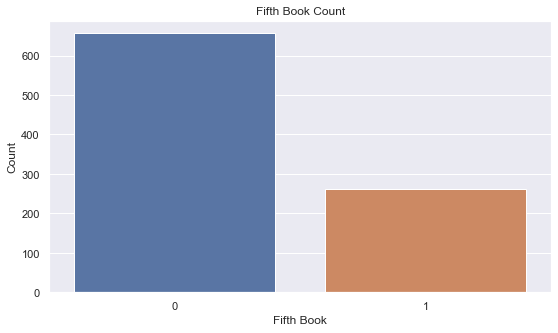

In [147]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['DwD'],order=df_characters['DwD'].value_counts().index)
plt.xlabel('Fifth Book')
plt.ylabel('Count')
plt.title('Fifth Book Count')

**As we can see more number of characters are appeared in third book**

Text(0.5, 1.0, 'Nobility vs Commoner')

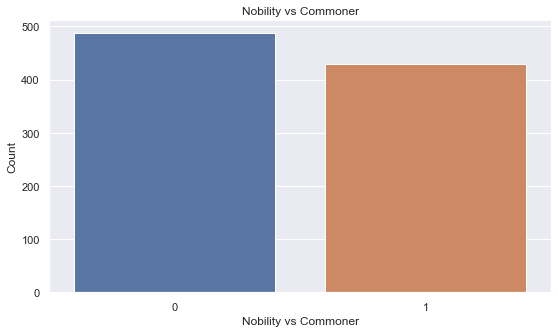

In [151]:
plt.figure(figsize=(9,5))
sns.set(style="darkgrid")
sns.countplot(df_characters['Nobility'],order=df_characters['Nobility'].value_counts().index)
plt.xlabel('Nobility vs Commoner')
plt.ylabel('Count')
plt.title('Nobility vs Commoner')

**Commoner are more compared to nobility. But nearly both are equal**